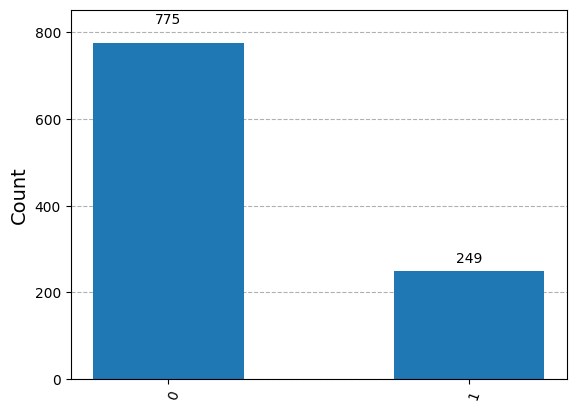

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create the quantum circuit
qc = QuantumCircuit(7, 1)

# Apply Hadamard gates
for qubit in [0, 1, 3, 4]:
    qc.h(qubit)

# Apply CNOT gates
qc.cx(0, 2)
qc.cx(1, 2)
qc.cx(3, 5)
qc.cx(4, 5)

# Apply final Toffoli (CCX) gate
qc.ccx(2, 5, 6)

# Measure qubit 6
qc.measure(6, 0)

# Execute the circuit on a simulator
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()

# Get the measurement counts
counts = result.get_counts(qc)

# Plot the histogram
plot_histogram(counts)

### Probability of $ q_6 = 1 $ Without Quantum Noise

In an ideal scenario without quantum noise, the probability of measuring $ q_6 $ as 1 would be 0.25 or 25%. This can be explained as follows:

1. **Superposition with Hadamard Gates**:
   - Hadamard gates are applied to $ q_0 $, $ q_1 $, $ q_3 $, and $ q_4 $. These gates put each qubit in a superposition state, where each qubit has a 50% chance of being 0 or 1.
   
2. **Conditions for $ q_6 = 1 $**:
   - For $ q_6 $ to be 1, both $ q_2 $ and $ q_5 $ need to be 1.
   - $ q_2 $ is 1 only when both $ q_0 $ and $ q_1 $ are 1, which happens with a 25% probability ($ 0.5 \times 0.5 $).
   - $ q_5 $ is 1 only when both $ q_3 $ and $ q_4 $ are 1, which also happens with a 25% probability ($ 0.5 \times 0.5 $).
   
3. **Independent Events**:
   - The probability of both these independent events occurring simultaneously is:
     $$
     0.25 \times 0.25 = 0.0625
     $$
   - Therefore, the probability of $ q_6 = 1 $ is 0.0625 or 6.25%.

4. **Expected Outcome**:
   - In a noiseless environment, you would expect to see $ q_6 = 1 $ in about 64 out of 1,024 shots (6.25% of the time).

